In [1]:
# --- Block 1: Import & Load ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('city_hour.csv')

print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
df.head()


Shape: (707875, 16)

Columns: ['City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']


,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


In [3]:
# --- Block 2: Explore & Prepare ---

# Ensure datetime is parsed
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')

# Basic exploration
print(df.info())
print("\nMissing values (top 20):")
print(df.isnull().sum().sort_values(ascending=False).head(20))

# Create helper time columns
df['date'] = df['Datetime'].dt.date
df['month'] = df['Datetime'].dt.to_period('M').astype(str)
df['year'] = df['Datetime'].dt.year

# Available cities
cities = sorted(df['City'].dropna().unique().tolist())
print("\nNumber of cities:", len(cities))
print("Sample cities:", cities[:10])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   City        707875 non-null  object        
 1   Datetime    707875 non-null  datetime64[ns]
 2   PM2.5       562787 non-null  float64       
 3   PM10        411138 non-null  float64       
 4   NO          591243 non-null  float64       
 5   NO2         590753 non-null  float64       
 6   NOx         584651 non-null  float64       
 7   NH3         435333 non-null  float64       
 8   CO          621358 non-null  float64       
 9   SO2         577502 non-null  float64       
 10  O3          578667 non-null  float64       
 11  Benzene     544229 non-null  float64       
 12  Toluene     487268 non-null  float64       
 13  Xylene      252046 non-null  float64       
 14  AQI         578795 non-null  float64       
 15  AQI_Bucket  578795 non-null  object        
dtypes:

In [5]:
# --- Block 3: Select City & Subset ---

# Pick your city here (change to whatever you need, e.g., "Delhi", "Mumbai", etc.)
target_city = "Delhi"

df_city = df[df['City'] == target_city].copy()
df_city = df_city.sort_values('Datetime')

print(f"Selected city: {target_city}")
print("Rows in selected city:", len(df_city))
df_city.head()


Selected city: Delhi
Rows in selected city: 48192


,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,date,month,year
245172,Delhi,2015-01-01 01:00:00,454.58,935.18,81.52,41.78,187.66,27.54,9.29,3.41,54.94,25.24,58.57,13.80,NaN,NaN,2015-01-01,2015-01,2015
245173,Delhi,2015-01-01 02:00:00,440.44,NaN,70.80,43.46,176.83,27.72,13.28,3.88,50.53,23.10,49.37,15.63,NaN,NaN,2015-01-01,2015-01,2015
245174,Delhi,2015-01-01 03:00:00,409.09,NaN,132.46,41.19,141.02,28.94,29.67,2.83,19.33,19.04,38.94,17.18,NaN,NaN,2015-01-01,2015-01,2015
245175,Delhi,2015-01-01 04:00:00,436.12,NaN,84.78,39.55,102.84,29.30,21.76,4.33,20.08,13.99,27.53,16.82,NaN,NaN,2015-01-01,2015-01,2015
245176,Delhi,2015-01-01 05:00:00,415.88,976.99,60.24,37.41,80.12,30.84,26.19,6.17,16.00,11.14,21.99,14.29,NaN,NaN,2015-01-01,2015-01,2015


In [7]:
# --- Block 4: Identify Variables ---

date_col = 'Datetime'
aqi_col = 'AQI'  # numeric (may have NaNs)
pollutant_cols = ['PM2.5', 'PM10', 'CO', 'NO2', 'SO2', 'O3', 'NH3', 'NO', 'NOx', 'Benzene', 'Toluene', 'Xylene']
pollutant_cols = [c for c in pollutant_cols if c in df_city.columns]

print("Using columns:")
print(" - Date/Time:", date_col)
print(" - AQI:", aqi_col)
print(" - Pollutants:", pollutant_cols)


Using columns:
 - Date/Time: Datetime
 - AQI: AQI
 - Pollutants: ['PM2.5', 'PM10', 'CO', 'NO2', 'SO2', 'O3', 'NH3', 'NO', 'NOx', 'Benzene', 'Toluene', 'Xylene']


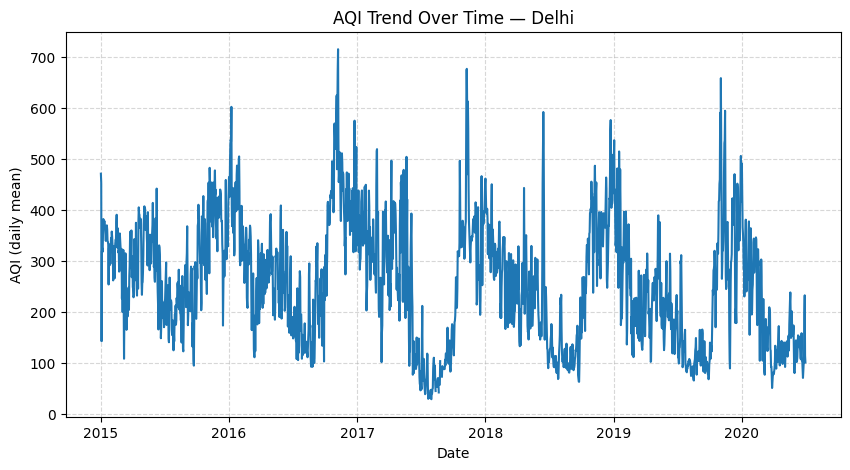

In [9]:
# --- Block 5: AQI Trend Over Time (daily mean) ---

# Resample daily to smooth hourly noise
aqi_daily = df_city.set_index(date_col)[aqi_col].resample('D').mean()

plt.figure(figsize=(10, 5))
plt.plot(aqi_daily.index, aqi_daily.values)
plt.title(f"AQI Trend Over Time — {target_city}")
plt.xlabel("Date")
plt.ylabel("AQI (daily mean)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


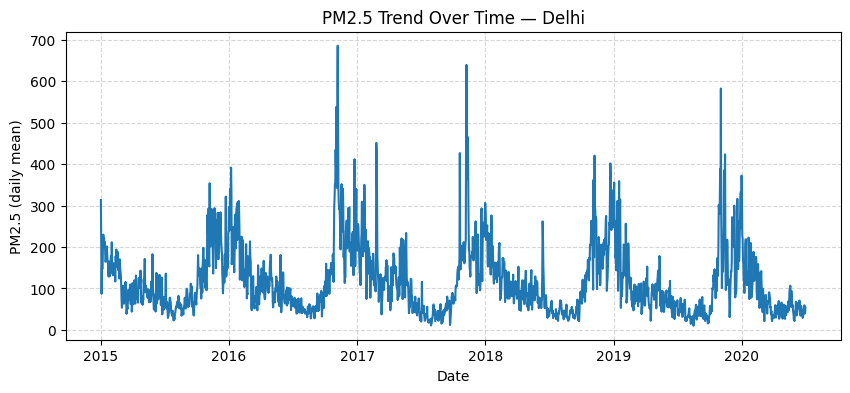

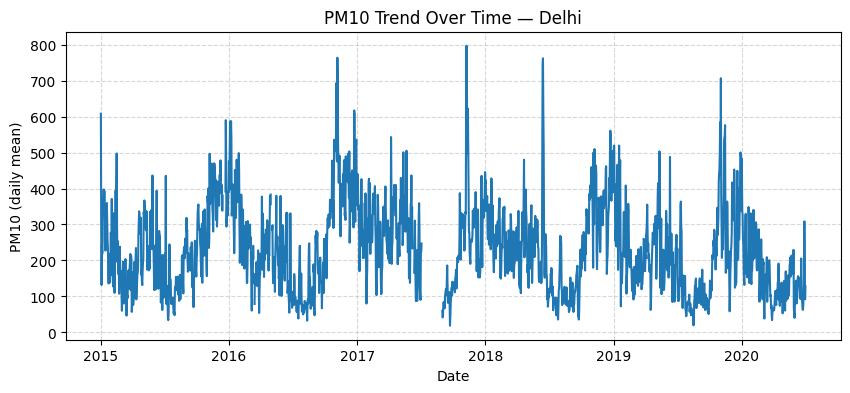

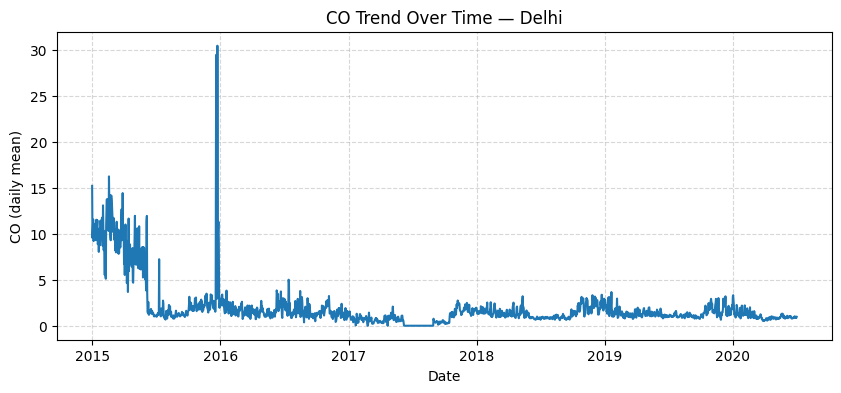

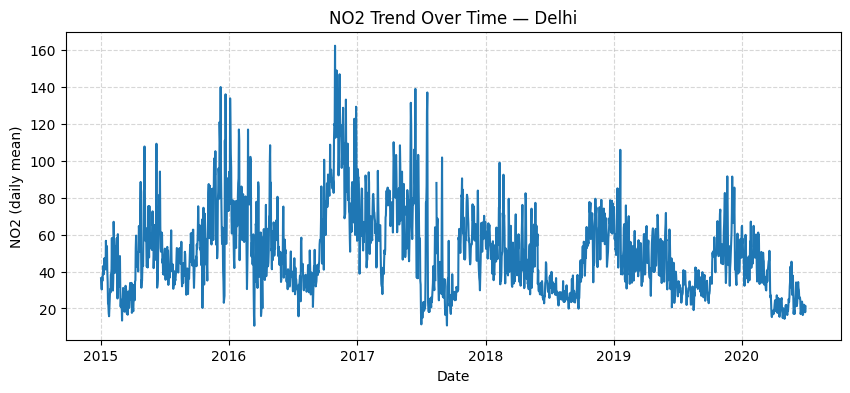

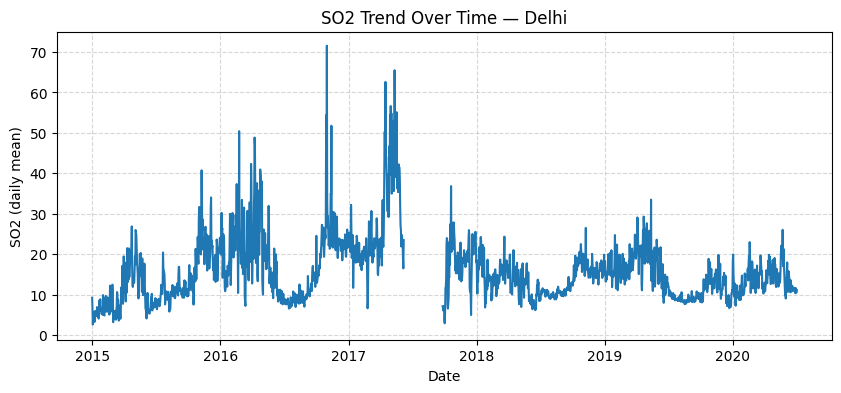

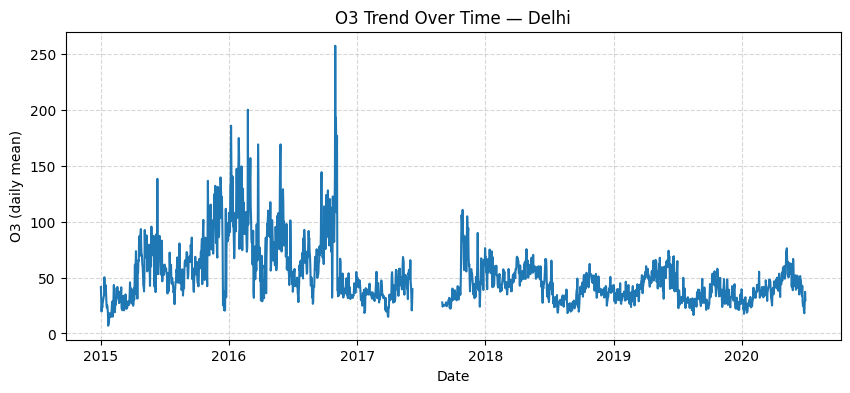

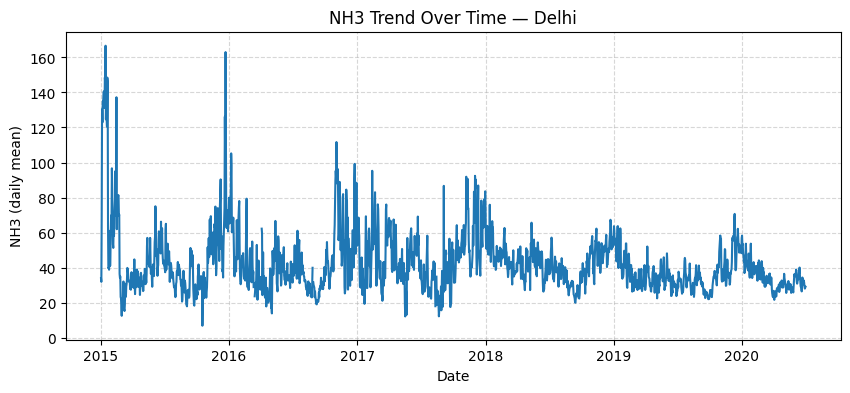

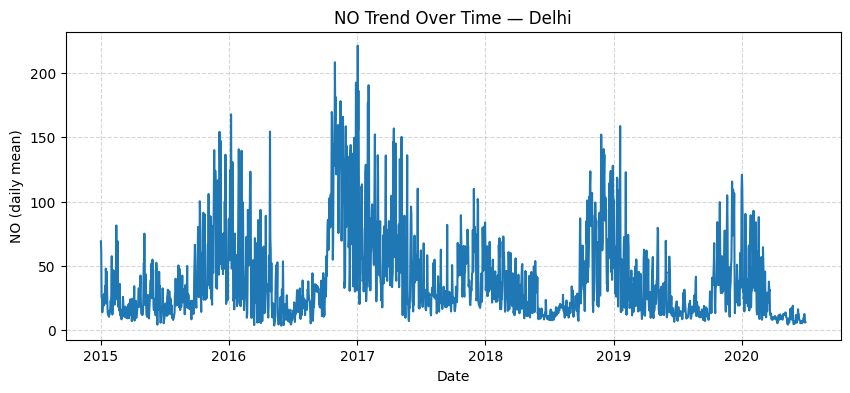

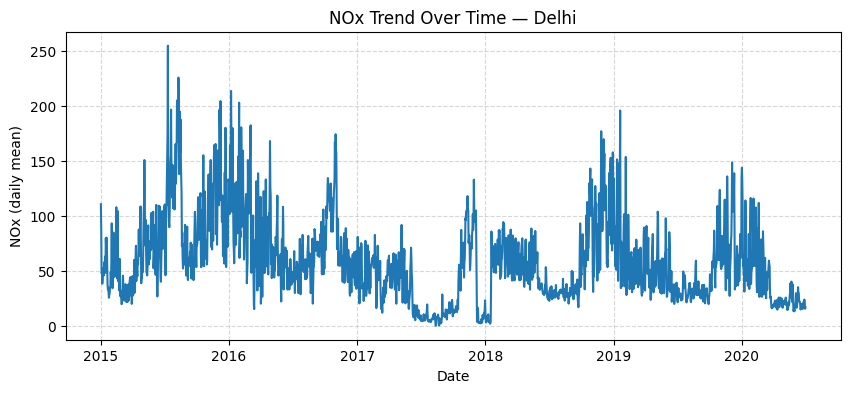

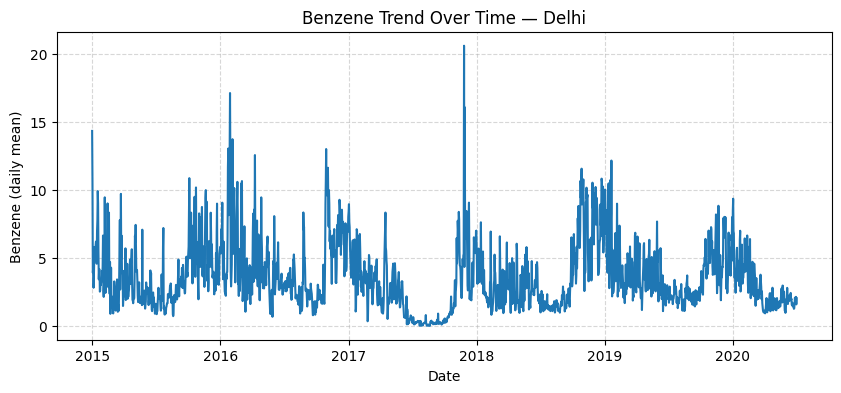

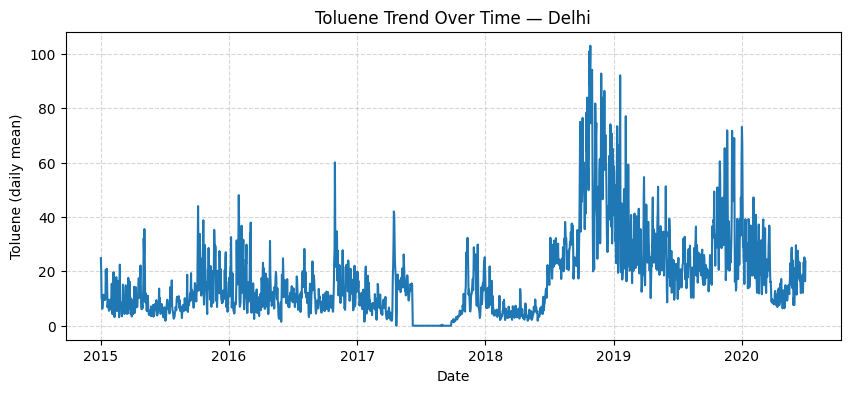

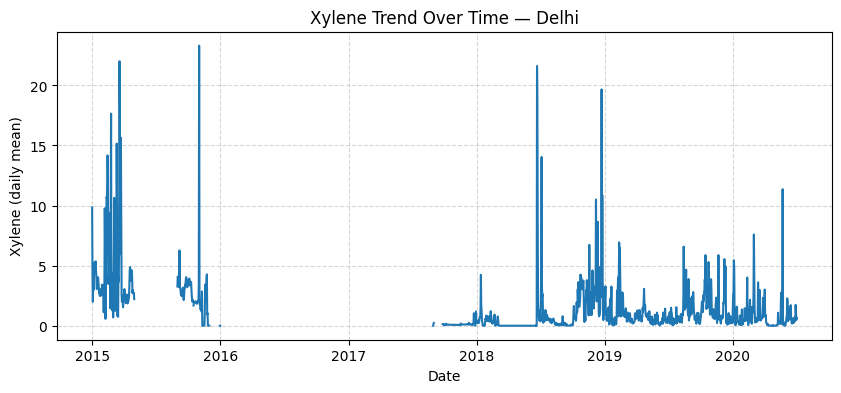

In [11]:
# --- Block 6: Pollutant Trends Over Time (separate plots) ---

# Resample daily to reduce noise
daily_pollutants = df_city.set_index(date_col)[pollutant_cols].resample('D').mean()

for col in pollutant_cols:
    plt.figure(figsize=(10, 4))
    plt.plot(daily_pollutants.index, daily_pollutants[col])
    plt.title(f"{col} Trend Over Time — {target_city}")
    plt.xlabel("Date")
    plt.ylabel(f"{col} (daily mean)")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()


/var/folders/nt/cm9_z_nx5yq0pgqw46gnrd_40000gn/T/ipykernel_10397/1902647391.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  aqi_monthly = df_city.set_index(date_col)[aqi_col].resample('M').mean().reset_index()


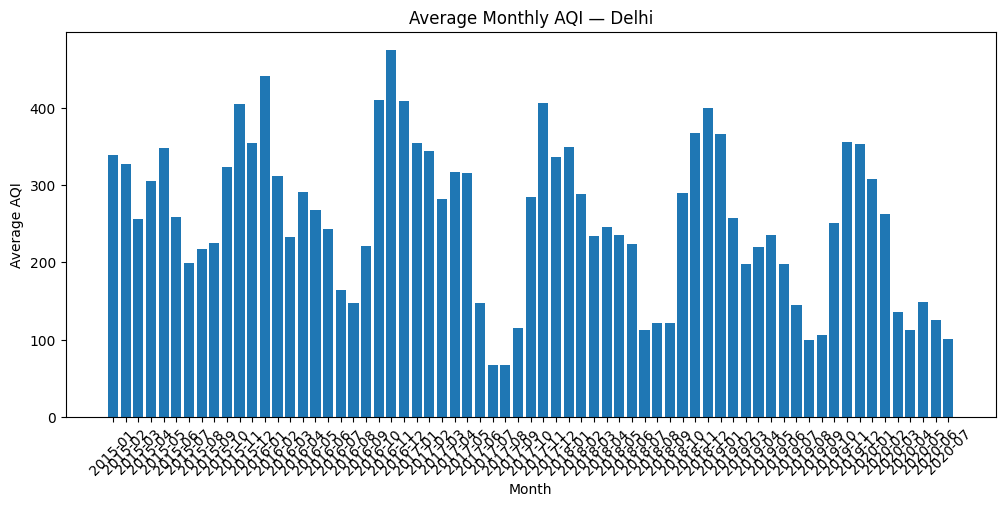

In [13]:
# --- Block 7: Bar Plot — Average Monthly AQI ---

aqi_monthly = df_city.set_index(date_col)[aqi_col].resample('M').mean().reset_index()
aqi_monthly['month_str'] = aqi_monthly['Datetime'].dt.to_period('M').astype(str)

plt.figure(figsize=(12, 5))
plt.bar(aqi_monthly['month_str'], aqi_monthly[aqi_col])
plt.title(f"Average Monthly AQI — {target_city}")
plt.xlabel("Month")
plt.ylabel("Average AQI")
plt.xticks(rotation=45)
plt.show()


/var/folders/nt/cm9_z_nx5yq0pgqw46gnrd_40000gn/T/ipykernel_10397/760119968.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_month, labels=month_order, showfliers=True)


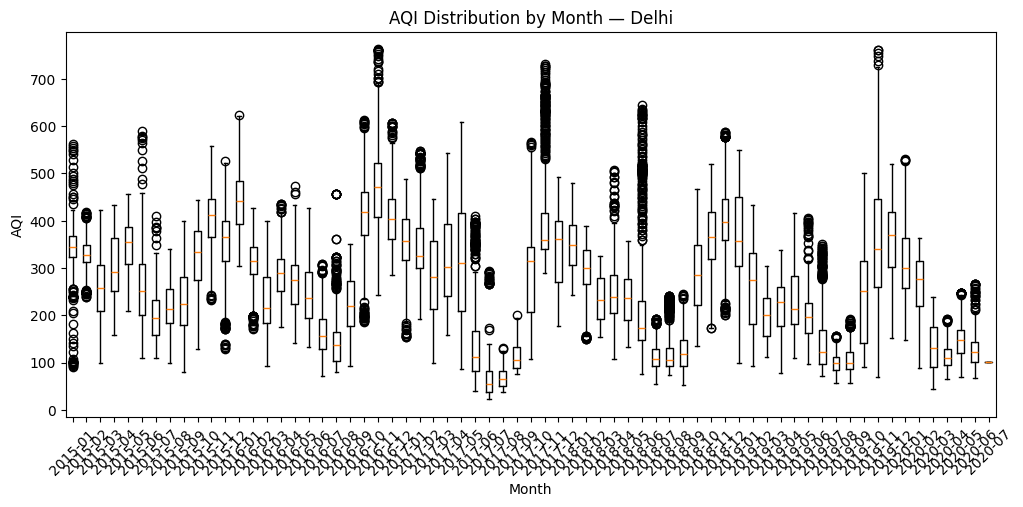

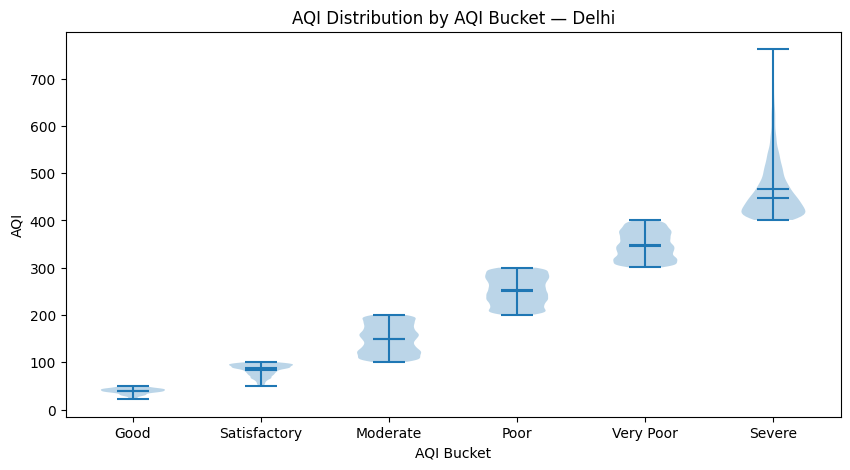

In [15]:
# --- Block 8: Box & Violin Plots ---

# Prepare data
aqi_valid = df_city[[aqi_col, 'month', 'AQI_Bucket']].dropna(subset=[aqi_col]).copy()

# Boxplot: AQI by month
# Build data list by month order
month_order = sorted(aqi_valid['month'].dropna().unique().tolist())
data_by_month = [aqi_valid.loc[aqi_valid['month'] == m, aqi_col].values for m in month_order]

plt.figure(figsize=(12, 5))
plt.boxplot(data_by_month, labels=month_order, showfliers=True)
plt.title(f"AQI Distribution by Month — {target_city}")
plt.xlabel("Month")
plt.ylabel("AQI")
plt.xticks(rotation=45)
plt.show()

# Violin plot: AQI by AQI_Bucket (if available)
if 'AQI_Bucket' in aqi_valid.columns:
    bucket_order = [b for b in ['Good','Satisfactory','Moderate','Poor','Very Poor','Severe']
                    if b in aqi_valid['AQI_Bucket'].unique()]
    if not bucket_order:
        bucket_order = sorted(aqi_valid['AQI_Bucket'].dropna().unique().tolist())

    data_by_bucket = [aqi_valid.loc[aqi_valid['AQI_Bucket'] == b, aqi_col].values for b in bucket_order]

    plt.figure(figsize=(10, 5))
    parts = plt.violinplot(data_by_bucket, showmeans=True, showextrema=True, showmedians=True)
    plt.title(f"AQI Distribution by AQI Bucket — {target_city}")
    plt.xlabel("AQI Bucket")
    plt.ylabel("AQI")
    plt.xticks(range(1, len(bucket_order)+1), bucket_order, rotation=0)
    plt.show()
